In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
%matplotlib inline

sess = tf.Session()

In [2]:
batch_size = 25
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [31]:
A = tf.Variable(tf.random_normal(shape=[1, 1]))
my_out = tf.multiply(x_data, A)


In [32]:
loss = tf.reduce_mean(tf.square(my_out - y_target))

In [33]:
sess.run(tf.global_variables_initializer())

In [34]:
opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)

In [39]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5 == 0:
        print('epoch: {}, A: {}'.format(i, sess.run(A)))
        tl = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('loss: {}'.format(tl))
        loss_batch.append(tl)

epoch: 4, A: [[-1.39285111]]
loss: 129.06883239746094
epoch: 9, A: [[-0.2989623]]
loss: 106.16165924072266
epoch: 14, A: [[ 0.68952245]]
loss: 86.44828033447266
epoch: 19, A: [[ 1.59190845]]
loss: 69.56047058105469
epoch: 24, A: [[ 2.39511633]]
loss: 58.55827331542969
epoch: 29, A: [[ 3.13124108]]
loss: 45.950687408447266
epoch: 34, A: [[ 3.78631425]]
loss: 39.150936126708984
epoch: 39, A: [[ 4.38135147]]
loss: 31.441509246826172
epoch: 44, A: [[ 4.91764879]]
loss: 23.929241180419922
epoch: 49, A: [[ 5.40080643]]
loss: 22.902542114257812
epoch: 54, A: [[ 5.83820915]]
loss: 17.40643310546875
epoch: 59, A: [[ 6.23197269]]
loss: 13.910382270812988
epoch: 64, A: [[ 6.59106588]]
loss: 14.171446800231934
epoch: 69, A: [[ 6.91326714]]
loss: 11.14599609375
epoch: 74, A: [[ 7.20032263]]
loss: 8.229497909545898
epoch: 79, A: [[ 7.46344519]]
loss: 6.922745227813721
epoch: 84, A: [[ 7.69754076]]
loss: 5.103902339935303
epoch: 89, A: [[ 7.90804768]]
loss: 3.884943962097168
epoch: 94, A: [[ 8.100347

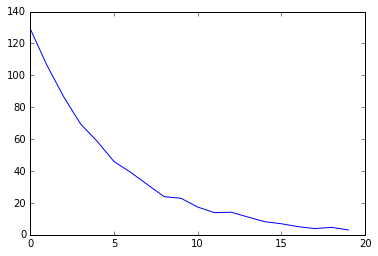

In [40]:
plt.plot(loss_batch)